# Probelm Statement

To model the demand for shared bikes with the available independent variables that will be used by the management to understand how exactly the demands vary with different features. 

Key questions to be answered:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

# Data Loading
## Step 1: Reading & Analysing the data

In [784]:
# Importing all required packages

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [785]:
# Supress Warnings
warnings.filterwarnings('ignore')

In [786]:
# Importing data set
biking = pd.read_csv('day.csv')
biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [787]:
# Brief summary of our data
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [788]:
#Renaming the columns for ease of understanding
biking.rename(columns = {'yr':'year','mnth':'month','hum':'humidity', 'weathersit' : 'weather_situation', 'cnt':'count'}, inplace = True) 
biking.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [789]:
biking.describe()

,instant,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [790]:
# Mapping all categorical values that'll help when creating dummy variables
biking['season'] = biking['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
biking['month'] = biking['month'].map({1 : 'jan', 2 : 'feb', 3 : 'march', 4 : 'april', 5 : 'may', 6 : 'june', 7 : 'july', 8 : 'aug', 9 : 'sep', 10 : 'oct', 11 : 'nov', 12 : 'dec'})
biking['weekday'] = biking['weekday'].map({1 : 'monday', 2 : 'tuesday', 3 : 'wednesday', 4 : 'thursday', 5 : 'friday', 6 : 'saturday', 0 : 'sunday'})
biking['weather_situation'] = biking['weather_situation'].map({1 : 'clear', 2 : 'misty', 3 : 'rainy'})
biking.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,jan,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


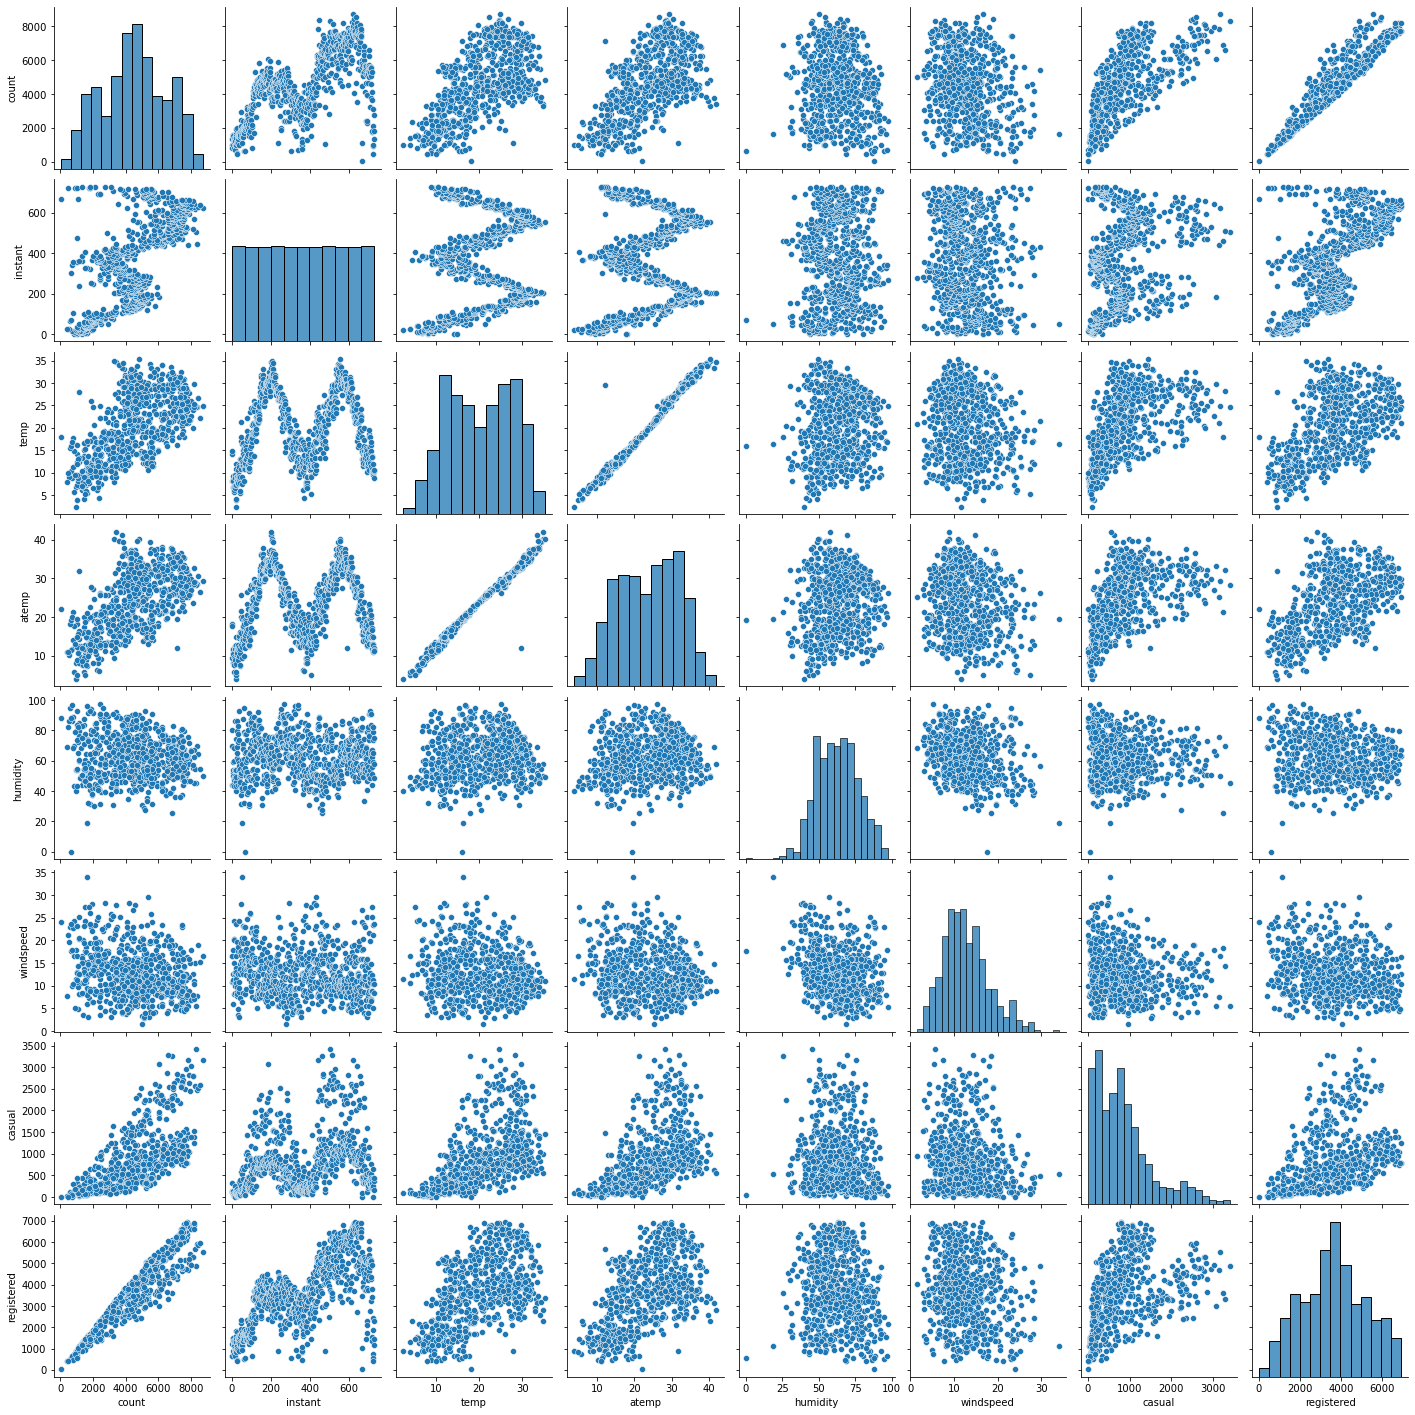

In [791]:
# Sensecheck on correlation between all numerical variables using Pairplot
all_num_vars = ['count', 'instant','temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
sns.pairplot(biking[all_num_vars])
plt.show()

## Pariplot Analysis Results
In the above plot, we can see that the count variable has good correlations with temp, atemp, casual and regsitered.

Casual and registered are simply different types of customers that form the count variable, i.e., casual + registered = count. Therefore we can drop those 2 columns. 

On the other hand temp and atemp are extremely correlated to each other and most likely we'll end up using one or the other in the final model to avoid colinearity between our independant variables.

We can also see that instant is simply an ID field and can be dropped as well.

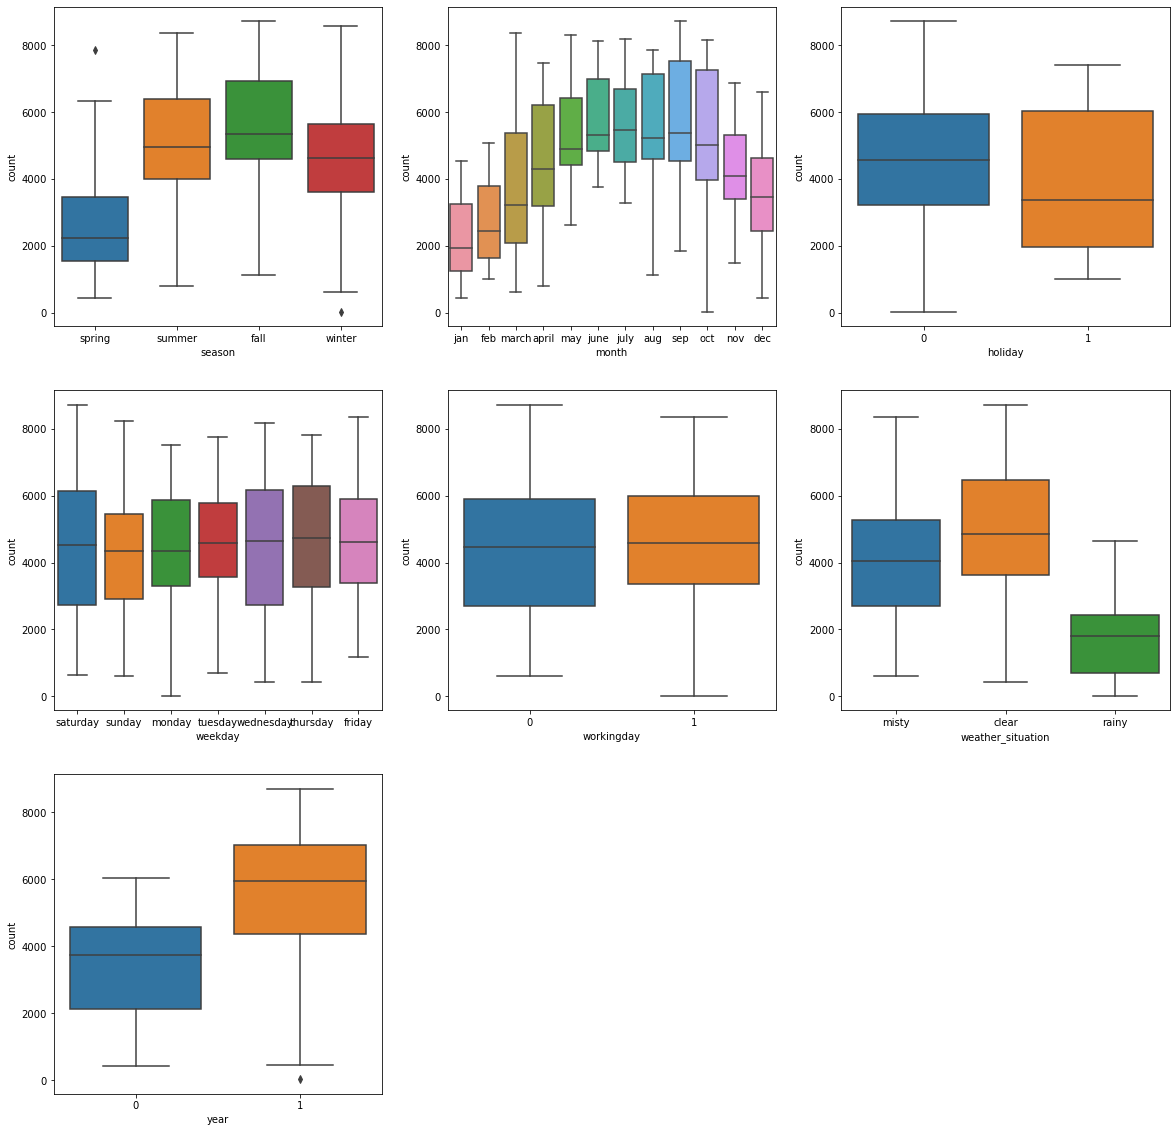

In [792]:
# Analysing the categorical variables
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = biking)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = biking)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'count', data = biking)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = biking)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = biking)
plt.subplot(3,3,6)
sns.boxplot(x = 'weather_situation', y = 'count', data = biking)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'count', data = biking)
plt.show()

## BoxPlot Analysis Results
1. season and month both follow similar patterns in their medians since consecutive months make up seasons anyway.
2. Workingday does not have much of an impact on the median but holiday does. Since workingday = not holiday or weekend, this roughly implies holidays have more of an impact than weekends.(as seen in the medians of the different weekdays)
3. The weather situation definitely has impact on the count and 2019 seems to have been a better year for the biking company since you see the entire distribution move up.

# Data Preparation
## Dummy Varibles

In [793]:
# Creating dummy vaariables for any categorical variables that have non numerical & > 2 unique values
seasons = pd.get_dummies(biking['season'], drop_first=True)
months = pd.get_dummies(biking['month'], drop_first=True)
weekdays = pd.get_dummies(biking['weekday'], drop_first=True)
weathersits = pd.get_dummies(biking['weather_situation'], drop_first=True)

biking = pd.concat([biking, seasons, months, weekdays, weathersits], axis = 1)
biking.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,misty,rainy
0,1,01-01-2018,spring,0,jan,0,saturday,0,misty,14.110847,...,0,0,0,1,0,0,0,0,1,0
1,2,02-01-2018,spring,0,jan,0,sunday,0,misty,14.902598,...,0,0,0,0,1,0,0,0,1,0
2,3,03-01-2018,spring,0,jan,0,monday,1,clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,jan,0,tuesday,1,clear,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,spring,0,jan,0,wednesday,1,clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [794]:
# Dropping the original columns
biking.drop(['season', 'month', 'weekday', 'weather_situation']
            , axis = 1, inplace=True)
biking.head()

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,misty,rainy
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,1,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,1,0,0,0,1,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [795]:
# Dropping other variables that are deemed to be not worthy to be fed into the model
biking.drop(['instant', 'casual', 'registered', 'dteday'], axis = 1, inplace=True)
biking.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,misty,rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Reasons for dopping above columns
1. instant -> ID, hence will not have qany impoact on the model.
2. casual, registered are all output dependant variables but since the total count is what the business requires, we can omit these as well.
3. dteday -> all useful information such as month, day and year, and even whether it is a holiday or not is available hence we can omit this as well.

## Test/Train Split

In [796]:
np.random.seed(0)
df_train, df_test = train_test_split(biking, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling
We scale since temp, humidity and other numerical values have all different units while the categorical values range only between 0 and 1.

In [797]:
scaler = MinMaxScaler()
num_vars = ['count','temp', 'atemp', 'humidity', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,misty,rainy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [798]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,misty,rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Matrix/Plot
We should be able to not only see highly correlated variables to the count (target) variable, but also find out out correlation between other independant variables.

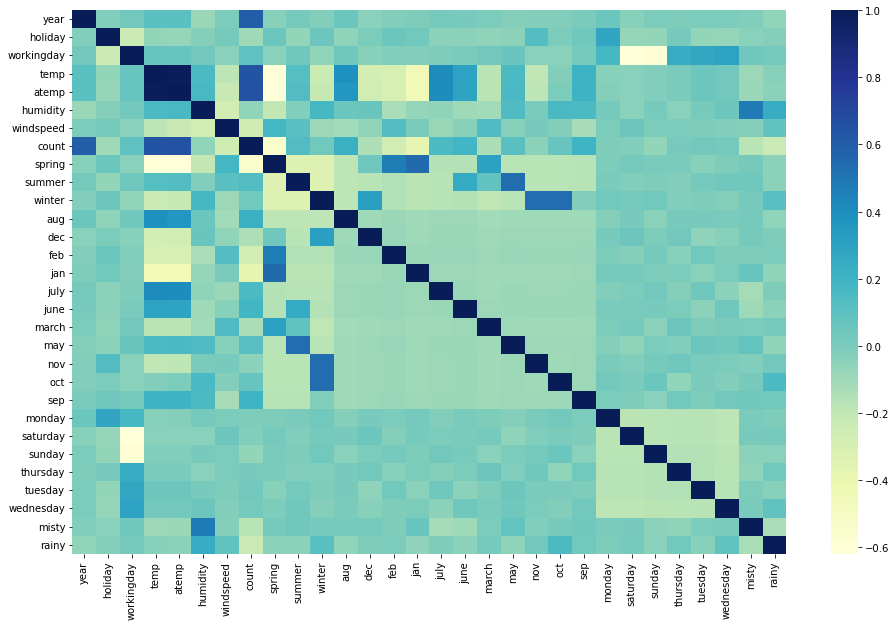

In [799]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), cmap="YlGnBu")
plt.show()


## Correlation Plot Analysis Results
1. Our target variable, count seems to be highly correlated with year, temp, atemp and spring.
2. Temp and atemp are highly correlated with each other.

In [800]:
cor = df_train.corr()['count']
print(cor.loc[lambda x : (x < -0.5) | (x > 0.5)])

year      0.591508
temp      0.643517
atemp     0.646475
count     1.000000
spring   -0.548871
Name: count, dtype: float64


## Prepping Data for Model
Let us now split our target variable from the independant variables

In [801]:
y_train = df_train.pop('count')
X_train = df_train

##  Incremental Approach
## Model 1
Let us first create a model with all the variables

In [802]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [803]:
X_train_lm

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,misty,rainy
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.762183,0.605840,0.355596,0,1,...,0,0,1,0,0,0,0,0,1,0
578,1.0,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,...,0,0,0,0,0,1,0,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,...,0,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,...,0,0,0,1,0,0,0,0,1,0


In [804]:
lr.params

const         0.245237
year          0.232208
holiday       0.010689
workingday    0.096962
temp          0.401322
atemp         0.050628
humidity     -0.151812
windspeed    -0.184388
spring       -0.048580
summer        0.038216
winter        0.105387
aug           0.016076
dec          -0.045572
feb          -0.032176
jan          -0.062565
july         -0.039277
june         -0.001704
march         0.001288
may           0.024691
nov          -0.041783
oct           0.007695
sep           0.081806
monday       -0.021502
saturday      0.096059
sunday        0.041527
thursday     -0.009750
tuesday      -0.019308
wednesday    -0.005733
misty        -0.061030
rainy        -0.256697
dtype: float64

In [805]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          8.42e-181
Time:                        15:45:26   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.0

## Model 1 Results & Interpretation
1. R2: 85.3%
2. There are mutliple variables with high p value, meaning low significance.

We'll use RFE and compare the model performance then.

## Model 2 using RFE

In [806]:
# Let us first see how many columns there are in total
X_train.columns.size

29

In [807]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Since there are 8 variables that have p values more than 0.5, let us reduce the dimensions by 5 to begin with.
rfe = RFE(estimator=lm, n_features_to_select=24)
rfe = rfe.fit(X_train, y_train)

In [808]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 5),
 ('march', False, 6),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', True, 1),
 ('monday', True, 1),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 3),
 ('tuesday', True, 1),
 ('wednesday', False, 4),
 ('misty', True, 1),
 ('rainy', True, 1)]

In [809]:
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'july', 'may', 'nov', 'sep', 'monday', 'saturday', 'sunday', 'tuesday',
       'misty', 'rainy'],
      dtype='object')

In [810]:
X_train.columns[~rfe.support_]

Index(['june', 'march', 'oct', 'thursday', 'wednesday'], dtype='object')

### Now that we know which variables are to be dropped, let us implement the model using statsmodel for better analysis

## Model 3 after 1 iteration of RFE dropping 5 variables
### total variables are now 24 from 29

In [811]:
X_train_rfe = X_train[selected_cols]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          7.46e-186
Time:                        15:45:26   Log-Likelihood:                 527.78
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -905.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.032      7.655      0.0

### We still see so many variables with high p values indicating very low significance. Hence, let us reduce the dimensions further by 5.

## Model 4 after 2 iterations of RFE dropping another 5 variables
###  total varibles are now 19 from 24

In [812]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Since there are 8 variables that have p values more than 0.5, let us reduce the dimensions by 5 to begin with.
rfe = RFE(estimator=lm, n_features_to_select=19)
rfe = rfe.fit(X_train, y_train)

In [813]:
selected_cols = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['aug', 'june', 'march', 'may', 'oct', 'monday', 'sunday', 'thursday',
       'tuesday', 'wednesday'],
      dtype='object')

In [814]:
X_train_rfe = X_train[selected_cols]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.47e-189
Time:                        15:45:27   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2875      0.038      7.623      0.0

### Model 4 Results & Interpretation
We can see that even though we have dropped 10 variables the R2 score has remained the same -> 85.2%
This reassures us that all the variables dropped were insignificant.
##### 'atemp' needs to be dropped due to its low signifiance.

## Model 5 dropping  'atemp'

In [815]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.55e-190
Time:                        15:45:27   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.0

### Dropping atemp has no effect on R2 value

### Since feb has the next highest p value, let us try dropping that as well and see how it effects the model performance.

## Model 6 dropping 'feb'

In [816]:
X_train_new = X_train_new.drop(["feb"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          9.55e-191
Time:                        15:45:27   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2759      0.037      7.452      0.0

### Dropping 'feb' has no effect on R2 value
### Let us do the same for 'holiday' as well

In [817]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.53e-191
Time:                        15:45:27   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.037      7.286      0.0

### Now we can see that all of the variables used in the model have high significance and therefore we can move onto the VIF check to see for high multicolinearity between the independant variables

## VIF check

In [818]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [819]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
#vif

### Humidity has too high of a VIF value and needs to be dropped inspite of a very low p value.

## Model 7 dropping 'humidity' 

In [820]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                        15:45:27   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.0

### VIF Check

In [821]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,spring,3.09
6,winter,3.02
5,summer,2.32
0,year,2.08
12,saturday,1.86
10,nov,1.78
8,jan,1.67


### We can see that 'temp' has high VIF but trying to drop the 'temp' might seem counterintuitive. We can run a model and see how the model performs and then decide on the next steps

## Model 8.0 dropping 'temp'

In [822]:
X_train_temp = X_train_new.drop(["temp"], axis = 1)

X_train_lm = sm.add_constant(X_train_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.05e-162
Time:                        15:45:27   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5460      0.019     29.005      0.0

### We can see that the model has now taken a hit and the R2 value has gone down by 5%. Let us check the VIF now

In [823]:
vif = pd.DataFrame()
vif['Features'] = X_train_temp.columns
vif['VIF'] = [variance_inflation_factor(X_train_temp.values, i) for i in range(X_train_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.25
1,workingday,3.55
3,spring,3.03
5,winter,3.00
4,summer,2.25
0,year,1.91
9,nov,1.76
7,jan,1.64
11,saturday,1.63
12,misty,1.56


#### There'e no significant multicolinearity between the remaining variables but if we arere ok with the reduced R2 value we can proceed with the same model otherwise we can revert to our previous model and compare performances. 

In [824]:
X_train_lm = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                        15:45:27   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.0

In [825]:
vif = pd.DataFrame()
vif['Features'] = X_train_temp.columns
vif['VIF'] = [variance_inflation_factor(X_train_temp.values, i) for i in range(X_train_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.25
1,workingday,3.55
3,spring,3.03
5,winter,3.00
4,summer,2.25
0,year,1.91
9,nov,1.76
7,jan,1.64
11,saturday,1.63
12,misty,1.56


### Residual Analysis of the train data
#### To verify the normal distribution of the error terms

Text(0.5, 0, 'Errors')

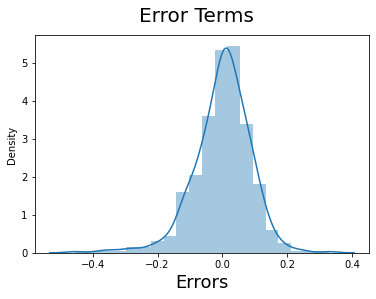

In [826]:
y_train_count = lm_7.predict(X_train_lm)

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

### As seen above, the error terms seems to peak at 0 thereby reassuring both the rules of linear regression

### Let's make some predictions

In [827]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [828]:
y_test = df_test.pop('count')
X_test = df_test


# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred = lm_7.predict(X_test_new)

## Model Evaluation

In [829]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008728669841267602
r_square_value : 0.8162223113743243


### Actual vs Predicted Plot

Text(0, 0.5, 'y_pred')

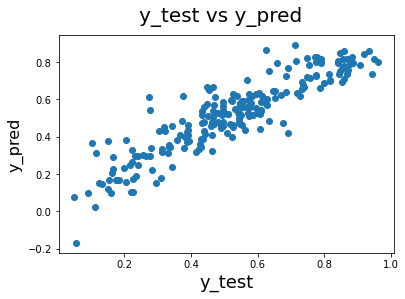

In [830]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

## Alternate Approach
### Model 9.0
#### This model is to achieve similar performance as seen before but to make the model ever more simpler (reducing the number of feature variables)
The approach we take here is to eliminate variables that already  have been represented indirectly by other variables. See below:
1. The individual months are already grouped under seasons and this is evident when you compare the boxplots of both months and seasons.
2. The individual days are already represented as holidays and weekdays so this too can be dropped.

In [831]:
# Importing data set
alt_biking = pd.read_csv('day.csv')
alt_biking.rename(columns = {'yr':'year','mnth':'month','hum':'humidity', 'weathersit' : 'weather_situation', 'cnt':'count'}, inplace = True) 
alt_biking['season'] = alt_biking['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
alt_biking['weather_situation'] = alt_biking['weather_situation'].map({1 : 'clear', 2 : 'misty', 3 : 'rainy'})

alt_biking.drop(['instant'], axis=1, inplace=True)
alt_biking.drop(['month'], axis=1, inplace=True)
alt_biking.drop(['weekday'], axis=1, inplace=True)
alt_biking.drop(['casual'], axis=1, inplace=True)
alt_biking.drop(['registered'], axis=1, inplace=True)
alt_biking.drop(['dteday'], axis=1, inplace=True)

alt_biking.head()

,season,year,holiday,workingday,weather_situation,temp,atemp,humidity,windspeed,count
0,spring,0,0,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [832]:
seasons = pd.get_dummies(alt_biking['season'], drop_first=True)
weathersits = pd.get_dummies(alt_biking['weather_situation'], drop_first=True)

alt_biking = pd.concat([alt_biking, seasons, weathersits], axis = 1)

alt_biking.drop(['season'], axis=1, inplace=True)
alt_biking.drop(['weather_situation'], axis=1, inplace=True)

alt_biking.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,winter,misty,rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [833]:
np.random.seed(0)
df_train, df_test = train_test_split(alt_biking, train_size = 0.7, test_size = 0.3, random_state = 100)

In [834]:
scaler = MinMaxScaler()
num_vars = ['count','temp', 'atemp', 'humidity', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,winter,misty,rainy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [835]:
y_train = df_train.pop('count')
X_train = df_train

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [836]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.86e-181
Time:                        15:45:27   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2803      0.036      7.763      0.0

#### We can see that the model proposed in this alternate approach is achieving 82.8% of R2 which is extremely close to our previous best performance. Let us try to drop a few features that are eirther non significant or having high VIF

In [837]:
X_train_lm = X_train_lm.drop(["atemp"], axis = 1)

X_train_lm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.26e-182
Time:                        15:45:27   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.036      7.768      0.0

In [838]:
X_train_lm = X_train_lm.drop(["workingday"], axis = 1)

X_train_lm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.78e-183
Time:                        15:45:27   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2925      0.036      8.224      0.0

In [839]:
X_train_lm.drop(['const'], axis=1, inplace=True)

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,27.02
2,temp,14.79
4,windspeed,4.64
5,spring,3.71
7,winter,3.05
8,misty,2.28
6,summer,2.24
0,year,2.07
9,rainy,1.24
1,holiday,1.04


#### We can build a model using just 9 variables after dropping 'humidity' due to its high VIF

## Model 9.1

In [840]:
X_train_lm = X_train_lm.drop(["humidity"], axis = 1)

X_train_lm = sm.add_constant(X_train_lm)

lm_9_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm_9_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.42e-181
Time:                        15:45:30   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2223      0.030      7.436      0.0

### As seen above, the R2 score -> 82.3%

In [841]:
X_train_vif = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.56
0,year,2.07
4,spring,1.96
5,summer,1.79
6,winter,1.62
7,misty,1.52
8,rainy,1.08
1,holiday,1.04


Text(0.5, 0, 'Errors')

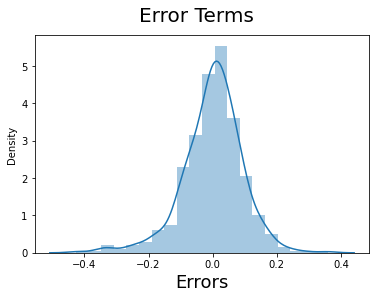

In [842]:
y_train_count = lm_9_1.predict(X_train_lm)

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [843]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('count')
X_test = df_test

X_train_lm.drop(['const'], axis=1, inplace=True)

X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred = lm_9_1.predict(X_test_new)

In [844]:
X_train_lm.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'misty', 'rainy'],
      dtype='object')

In [845]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009452972491040733
r_square_value : 0.8009724887482658


Text(0, 0.5, 'y_pred')

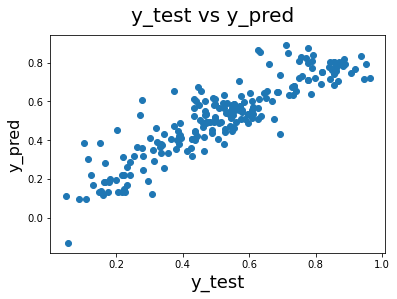

In [846]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### Even using just 9 variables, we are able to achieve a really good model thereby achieving simplicity.

## Now based on the business requirement, we can choose between our 2 best models.

## Model 7
No. of variables: 15

R-squared on training data: 0.845

Adj. R-squared on training data: 0.840

MSE on test: 0.008576346740100792

R-squared on test data: 0.8194293965277096

## Model 9.1
No. of variables: 9

R-squared on training data: 0.823

Adj. R-squared on training data: 0.820

MSE on test: 0.009452972491040733

R-squared on test data: 0.8009724887482658


In [847]:
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                        15:45:54   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.000       0.135       0.264
year           0.2346      0.008     29.196      0.000       0.219       0.250
workingday     0.0548      0.011      5.027      0.000       0.033       0.076
temp           0.4344      0.036     12.184      0.000       0.364       0.504
windspeed     -0.1610      0.025     -6.479      0.000      -0.210      -0.112
spring        -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer         0.0338      0.015      2.219      0.027       0.004       0.064
winter         0.0919      0.018      5.209      0.000       0.057       0.127
dec           -0.0483      0.017     -2.778      0.006      -0.083      -0.014
jan           -0.0528      0.018     -2.924      0.004      -0.088      -0.017
july          -0.0469      0.018     -2.575      0.010      -0.083      -0.011
nov           -0.0469      0.019     -2.518      0.012      -0.083      -0.010
sep            0.0648      0.017      3.859      0.000       0.032       0.098
saturday       0.0671      0.014      4.777      0.000       0.040       0.095
misty         -0.0831      0.009     -9.686      0.000      -0.100      -0.066
rainy         -0.2980      0.024    -12.291      0.000      -0.346      -0.250
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [848]:
lm_9_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.42e-181
Time:                        15:46:03   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2223      0.030      7.436      0.000       0.164       0.281
year           0.2340      0.009     27.430      0.000       0.217       0.251
holiday       -0.0877      0.027     -3.254      0.001      -0.141      -0.035
temp           0.4667      0.034     13.720      0.000       0.400       0.533
windspeed     -0.1546      0.026     -5.948      0.000      -0.206      -0.104
spring        -0.0824      0.021     -3.947      0.000      -0.123      -0.041
summer         0.0371      0.014      2.648      0.008       0.010       0.065
winter         0.0760      0.017      4.512      0.000       0.043       0.109
misty         -0.0763      0.009     -8.438      0.000      -0.094      -0.059
rainy         -0.2794      0.026    -10.919      0.000      -0.330      -0.229
==============================================================================
Omnibus:                       62.627   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.655
Skew:                          -0.635   Prob(JB):                     2.61e-34
Kurtosis:                       5.380   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""